In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00


In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#defining dataset paths
dataset_path='/content/drive/MyDrive/Dataset/dataset_split'
train_path=dataset_path+'/train'
dataset_yaml_path=dataset_path+'/data.yaml'
!ls "$train_path"

images	labels	labels.cache


In [ ]:
from ultralytics import YOLO
model=YOLO('yolov8n-seg.pt')   # loading pretrainedmodel

In [ ]:
## fine tuning the model on the images dataset
results=model.train(
    data=dataset_yaml_path,
    epochs=100,
    imgsz=640,
    batch=16,
    name="yolov8segmentation-traffic",
    exist_ok=True
)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Dataset/dataset_split/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8segmentation-traffic, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True

In [ ]:
# created and trained the YOLO model object
metrics = model.val()  # runs validation on val dataset specified in your data.yaml

# This prints summary stats:
print(metrics)




Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,649 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 549.0±397.7 MB/s, size: 7184.3 KB)
val: Scanning /content/drive/MyDrive/Dataset/dataset_split/val/labels.cache... 10 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 10/10 19.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.5it/s 2.0s
                   all         10        102       0.64      0.722      0.713      0.465      0.646      0.736      0.705      0.425
            Pedestrian          8         47      0.501      0.638      0.506      0.277      0.501      0.638      0.469      0.221
                 Bikes          4          5      0.775      0.702      0.928      0.538       0.78      0.722      0.928      0.554
              Vehicles


image 1/1 /content/drive/MyDrive/Dataset/dataset_split/val/images/17533286-hd_1080_1920_30fps_frame_034.png: 640x384 3 Pedestrians, 2 Vehicless, 48.2ms
Speed: 2.0ms preprocess, 48.2ms inference, 24.3ms postprocess per image at shape (1, 3, 640, 384)


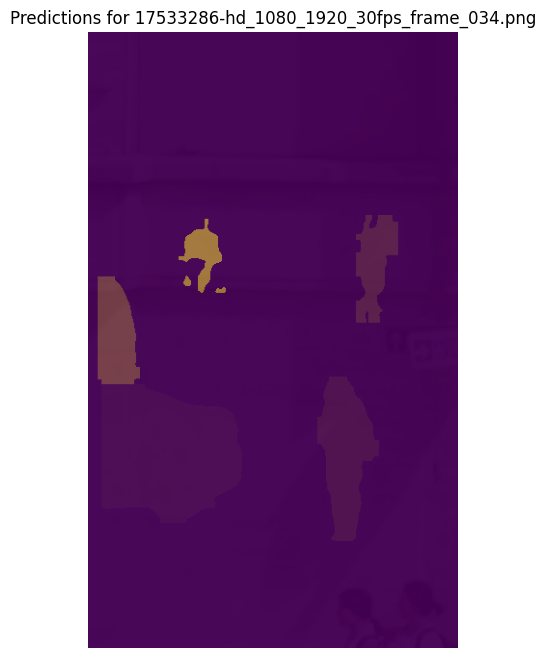


image 1/1 /content/drive/MyDrive/Dataset/dataset_split/val/images/19781340-uhd_3840_2160_25fps_frame_004.png: 384x640 5 Pedestrians, 1 Bikes, 3 Vehicless, 48.1ms
Speed: 2.2ms preprocess, 48.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


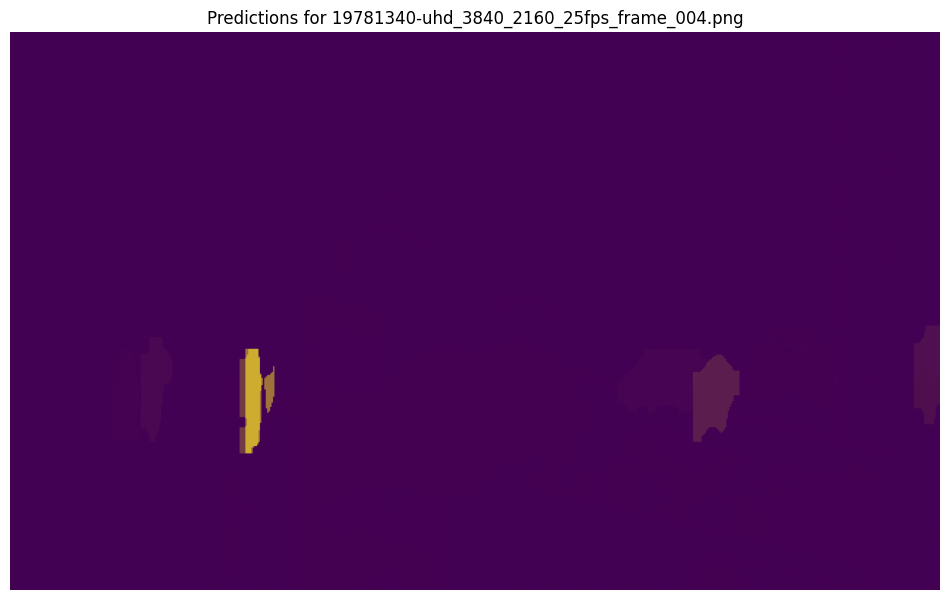


image 1/1 /content/drive/MyDrive/Dataset/dataset_split/val/images/19781340-uhd_3840_2160_25fps_frame_016.png: 384x640 3 Pedestrians, 3 Vehicless, 12.3ms
Speed: 3.5ms preprocess, 12.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


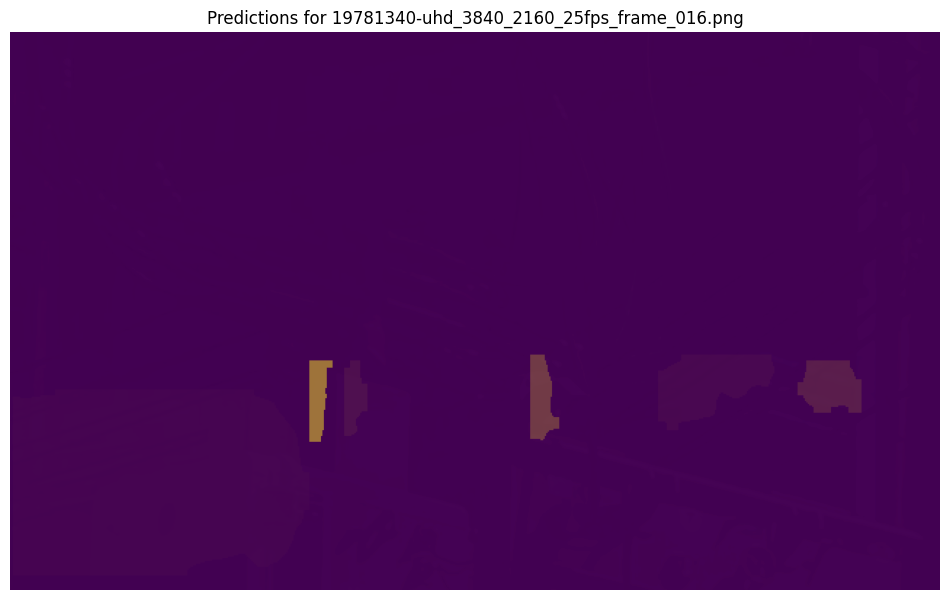


image 1/1 /content/drive/MyDrive/Dataset/dataset_split/val/images/19781340-uhd_3840_2160_25fps_frame_020.png: 384x640 7 Pedestrians, 7.5ms
Speed: 2.2ms preprocess, 7.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


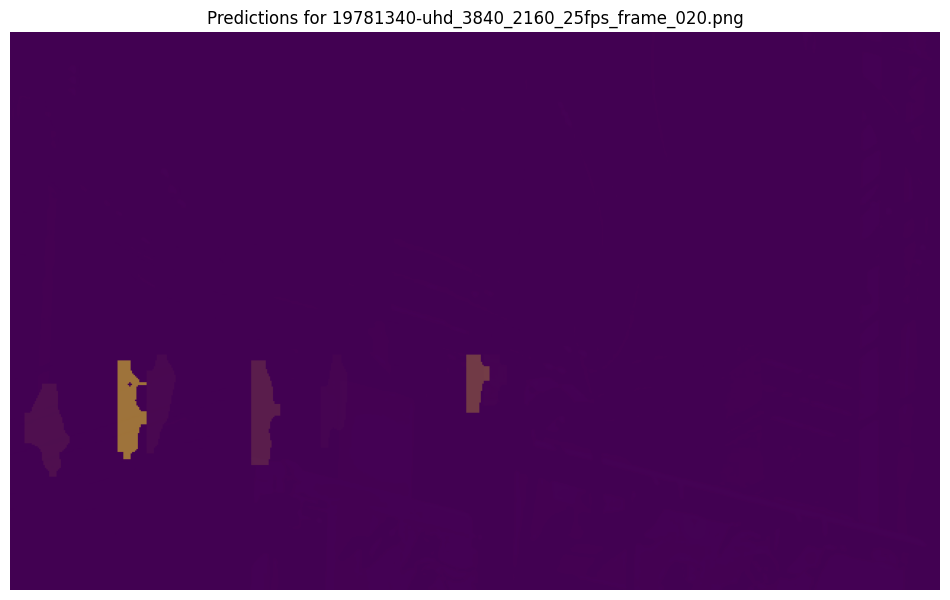


image 1/1 /content/drive/MyDrive/Dataset/dataset_split/val/images/19781340-uhd_3840_2160_25fps_frame_030.png: 384x640 1 Pedestrian, 5 Vehicless, 8.7ms
Speed: 2.3ms preprocess, 8.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


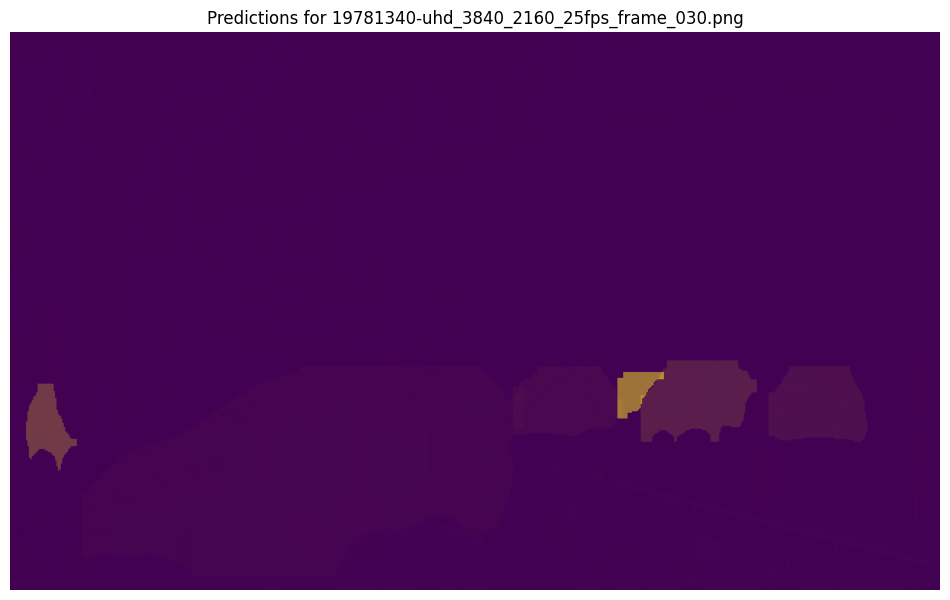


image 1/1 /content/drive/MyDrive/Dataset/dataset_split/val/images/19781340-uhd_3840_2160_25fps_frame_044.png: 384x640 3 Pedestrians, 5 Vehicless, 9.4ms
Speed: 3.4ms preprocess, 9.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


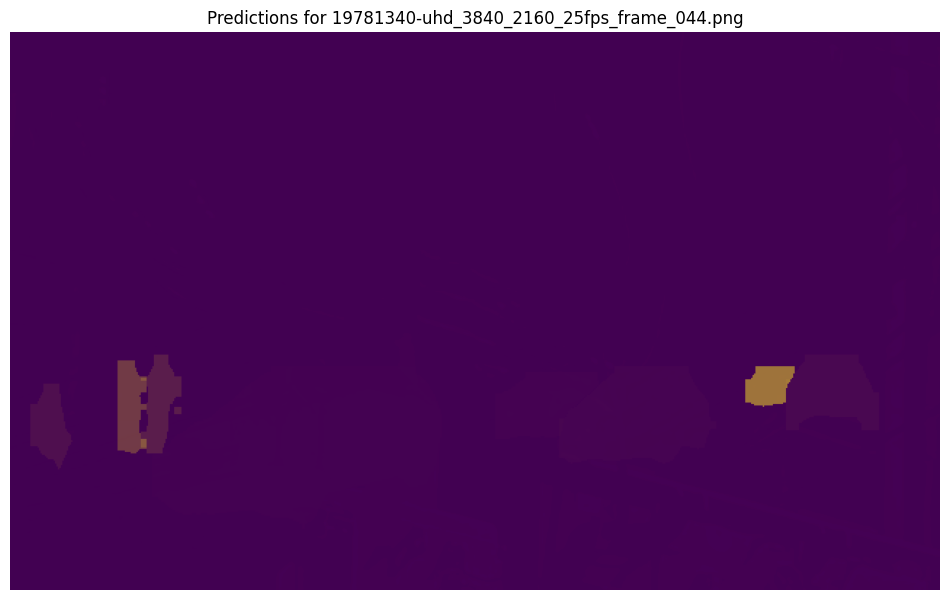


image 1/1 /content/drive/MyDrive/Dataset/dataset_split/val/images/5631418-hd_1920_1080_25fps_frame_001.png: 384x640 3 Pedestrians, 4 Vehicless, 13.2ms
Speed: 3.1ms preprocess, 13.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


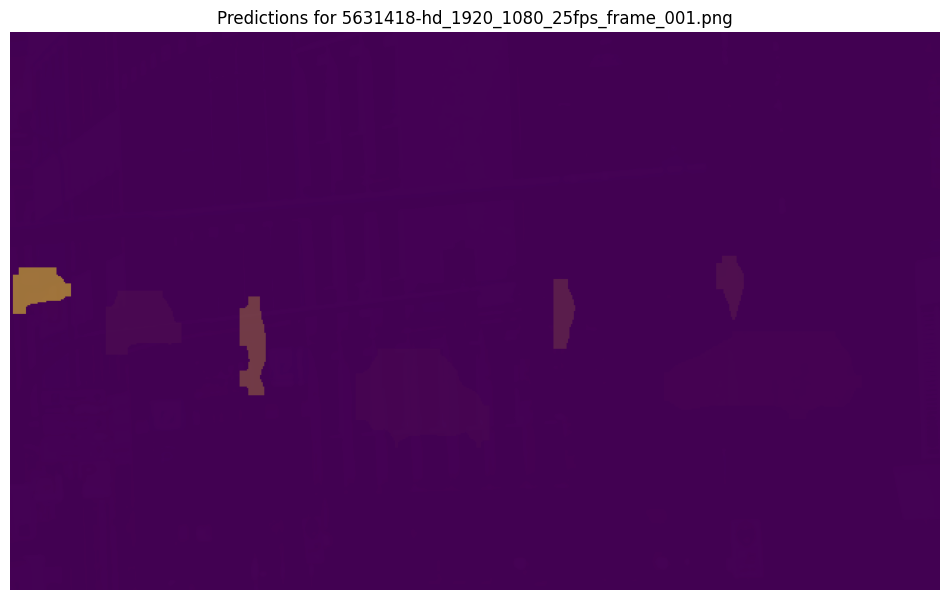

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load your trained YOLOv8 segmentation model weights
model = YOLO('/content/runs/segment/yolov8segmentation-traffic/weights/best.pt')

# Path to validation images folder (update to your folder)
val_images_dir = '/content/drive/MyDrive/Dataset/dataset_split/val/images'

# List all image file names from validation folder (assuming jpg/jpeg/png)
val_image_files = [f for f in os.listdir(val_images_dir) if f.lower().endswith(( '.png'))]

# Visualize predictions on each image
for img_file in val_image_files[:10]:  # just first 10 images
    img_path = os.path.join(val_images_dir, img_file)
    results = model.predict(source=img_path, conf=0.5, show=False)  # predict without showing

    # results[0] contains the detection result for the image
    result = results[0]

    # Convert image to RGB for plotting
    img = cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)

    # Plot original image
    plt.figure(figsize=(12, 8))
    plt.imshow(img)

    # Overlay masks with transparency
    for mask in result.masks.data:
        plt.imshow(mask.cpu().numpy(), alpha=0.5)

    plt.title(f'Predictions for {img_file}')
    plt.axis('off')
    plt.show()


In [ ]:
# Install dependencies
!pip install ultralytics supervision lap cython_bbox onemetric

In [ ]:
import supervision as sv
from ultralytics import YOLO
import numpy as np

# --- Your file paths ---
model_path = '/content/runs/segment/yolov8segmentation-traffic/weights/best.pt'
source_video_path = '/content/1860079-uhd_2560_1440_25fps.mp4' # Make sure filename is correct
target_video_path = '/content/output_tracked.mp4'

# Load the model and initialize the tracker
model = YOLO(model_path)
tracker = sv.ByteTrack()

# --- THIS IS THE CORRECTED LINE ---
# Use the simpler, correct name 'BoxAnnotator'
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Get video info and frame generator
video_info = sv.VideoInfo.from_video_path(source_video_path)
frame_generator = sv.get_video_frames_generator(source_path=source_video_path)

# Open a video sink to save the output
with sv.VideoSink(target_video_path, video_info) as sink:

    # Loop through each frame of the video
    for frame in frame_generator:
        # Get model predictions
        results = model(frame)[0]
        detections = sv.Detections.from_ultralytics(results)

        # The tracker updates the detections object in-place with tracker_id
        detections = tracker.update_with_detections(detections)

        # Create labels for the annotations
        labels = [
            f"ID #{tracker_id}"
            for tracker_id in detections.tracker_id
        ]

        # Annotate the frame with the tracked detections
        # Note the use of the corrected variable name 'box_annotator'
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=detections
        )
        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=detections,
            labels=labels
        )

        # Write the annotated frame to the output video
        sink.write_frame(frame=annotated_frame)


0: 384x640 1 Bikes, 8 Vehicless, 17.5ms
Speed: 4.8ms preprocess, 17.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 Vehicless, 10.6ms
Speed: 3.6ms preprocess, 10.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 Vehicless, 20.3ms
Speed: 6.6ms preprocess, 20.3ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 Vehicless, 22.7ms
Speed: 6.1ms preprocess, 22.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 Vehicless, 10.1ms
Speed: 4.5ms preprocess, 10.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 Vehicless, 22.1ms
Speed: 5.4ms preprocess, 22.1ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 Vehicless, 20.0ms
Speed: 4.9ms preprocess, 20.0ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 Vehicless, 14.9ms
Speed: 4.2ms preprocess, 14.9ms inference, 2.9ms p